# MagPySV example workflow

# Setup

In [1]:
# Setup python paths and import some modules
from IPython.display import Image
import sys
sys.path.append('..')
import os
import datetime as dt

In [2]:
%matplotlib notebook

In [3]:
# Import all of the MagPySV modules
import magpysv.denoise as denoise
import magpysv.inputoutput as inputoutput
import magpysv.model_prediction as model_prediction
import magpysv.svplots as svplots
import magpysv.svtools as svtools

In [4]:
stations = model_prediction.get_observatory_list()

# Residuals

Select a few observatories

In [5]:
obs_names = ['BRW', 'MBC']
fig_path = '/Users/gracecox/Desktop/DataDownloads/denoised_sv/brw_mbc/'

Concatenate the data for our selected observatories.

In [6]:
start = dt.datetime(1960, 1, 1)
end = dt.datetime(2010, 12, 31)
#start = dt.datetime(2000, 1, 1)
#end = dt.datetime(2010, 12, 31)
obs_data, model_sv_data, model_mf_data = inputoutput.combine_csv_data(
    start_date=start, end_date=end, obs_list=obs_names,
    data_path="/Users/gracecox/Desktop/DataDownloads/monthly_sv/data/",
    model_path="/Users/gracecox/Dropbox/cov-obs_x1/monthly_vals/")

/Users/gracecox/anaconda/envs/py35/lib/python3.5/site-packages/pandas/tseries/index.py:817: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  "or DatetimeIndex", PerformanceWarning)


In [7]:
dates = obs_data['date']

# Outlier detection

Optionally remove spikes in the data before denoising. Large outliers can affect the denoising process so better to remove them beforehand for some series (i.e. at high latitude observatories).

In [8]:
obs_data.drop(['date'], axis=1, inplace=True)
for column in obs_data:    
    obs_data[column] = denoise.detect_outliers(dates=dates, signal=obs_data[column], obs_name=column,
                                               threshold=2.5,
                                               window_length=72, plot_fig=False, save_fig=False,
                                               write_path='/Users/gracecox/Desktop/DataDownloads/denoised_sv/outliers/')
obs_data.insert(0, 'date', dates)

# External noise removal

Compute the residuals and use the eigenvalues/vectors of the covariance matrix to remove unmodelled external signal (Wardinski & Holme, 2011)

In [9]:
residuals = svtools.calculate_residuals(obs_data=obs_data, model_data=model_sv_data)

In [10]:
model_sv_data.drop(['date'], axis=1, inplace=True)
obs_data.drop(['date'], axis=1, inplace=True)

In [11]:
denoised, proxy, eigenvals, eigenvecs = denoise.eigenvalue_analysis(
    dates=dates, obs_data=obs_data, model_data=model_sv_data, residuals=residuals,
    proxy_number=1)

# Denoised SV plots

Plots showing the original SV data, the denoised data (optionally with a running average) and the field model predictions.

<IPython.core.display.Javascript object>


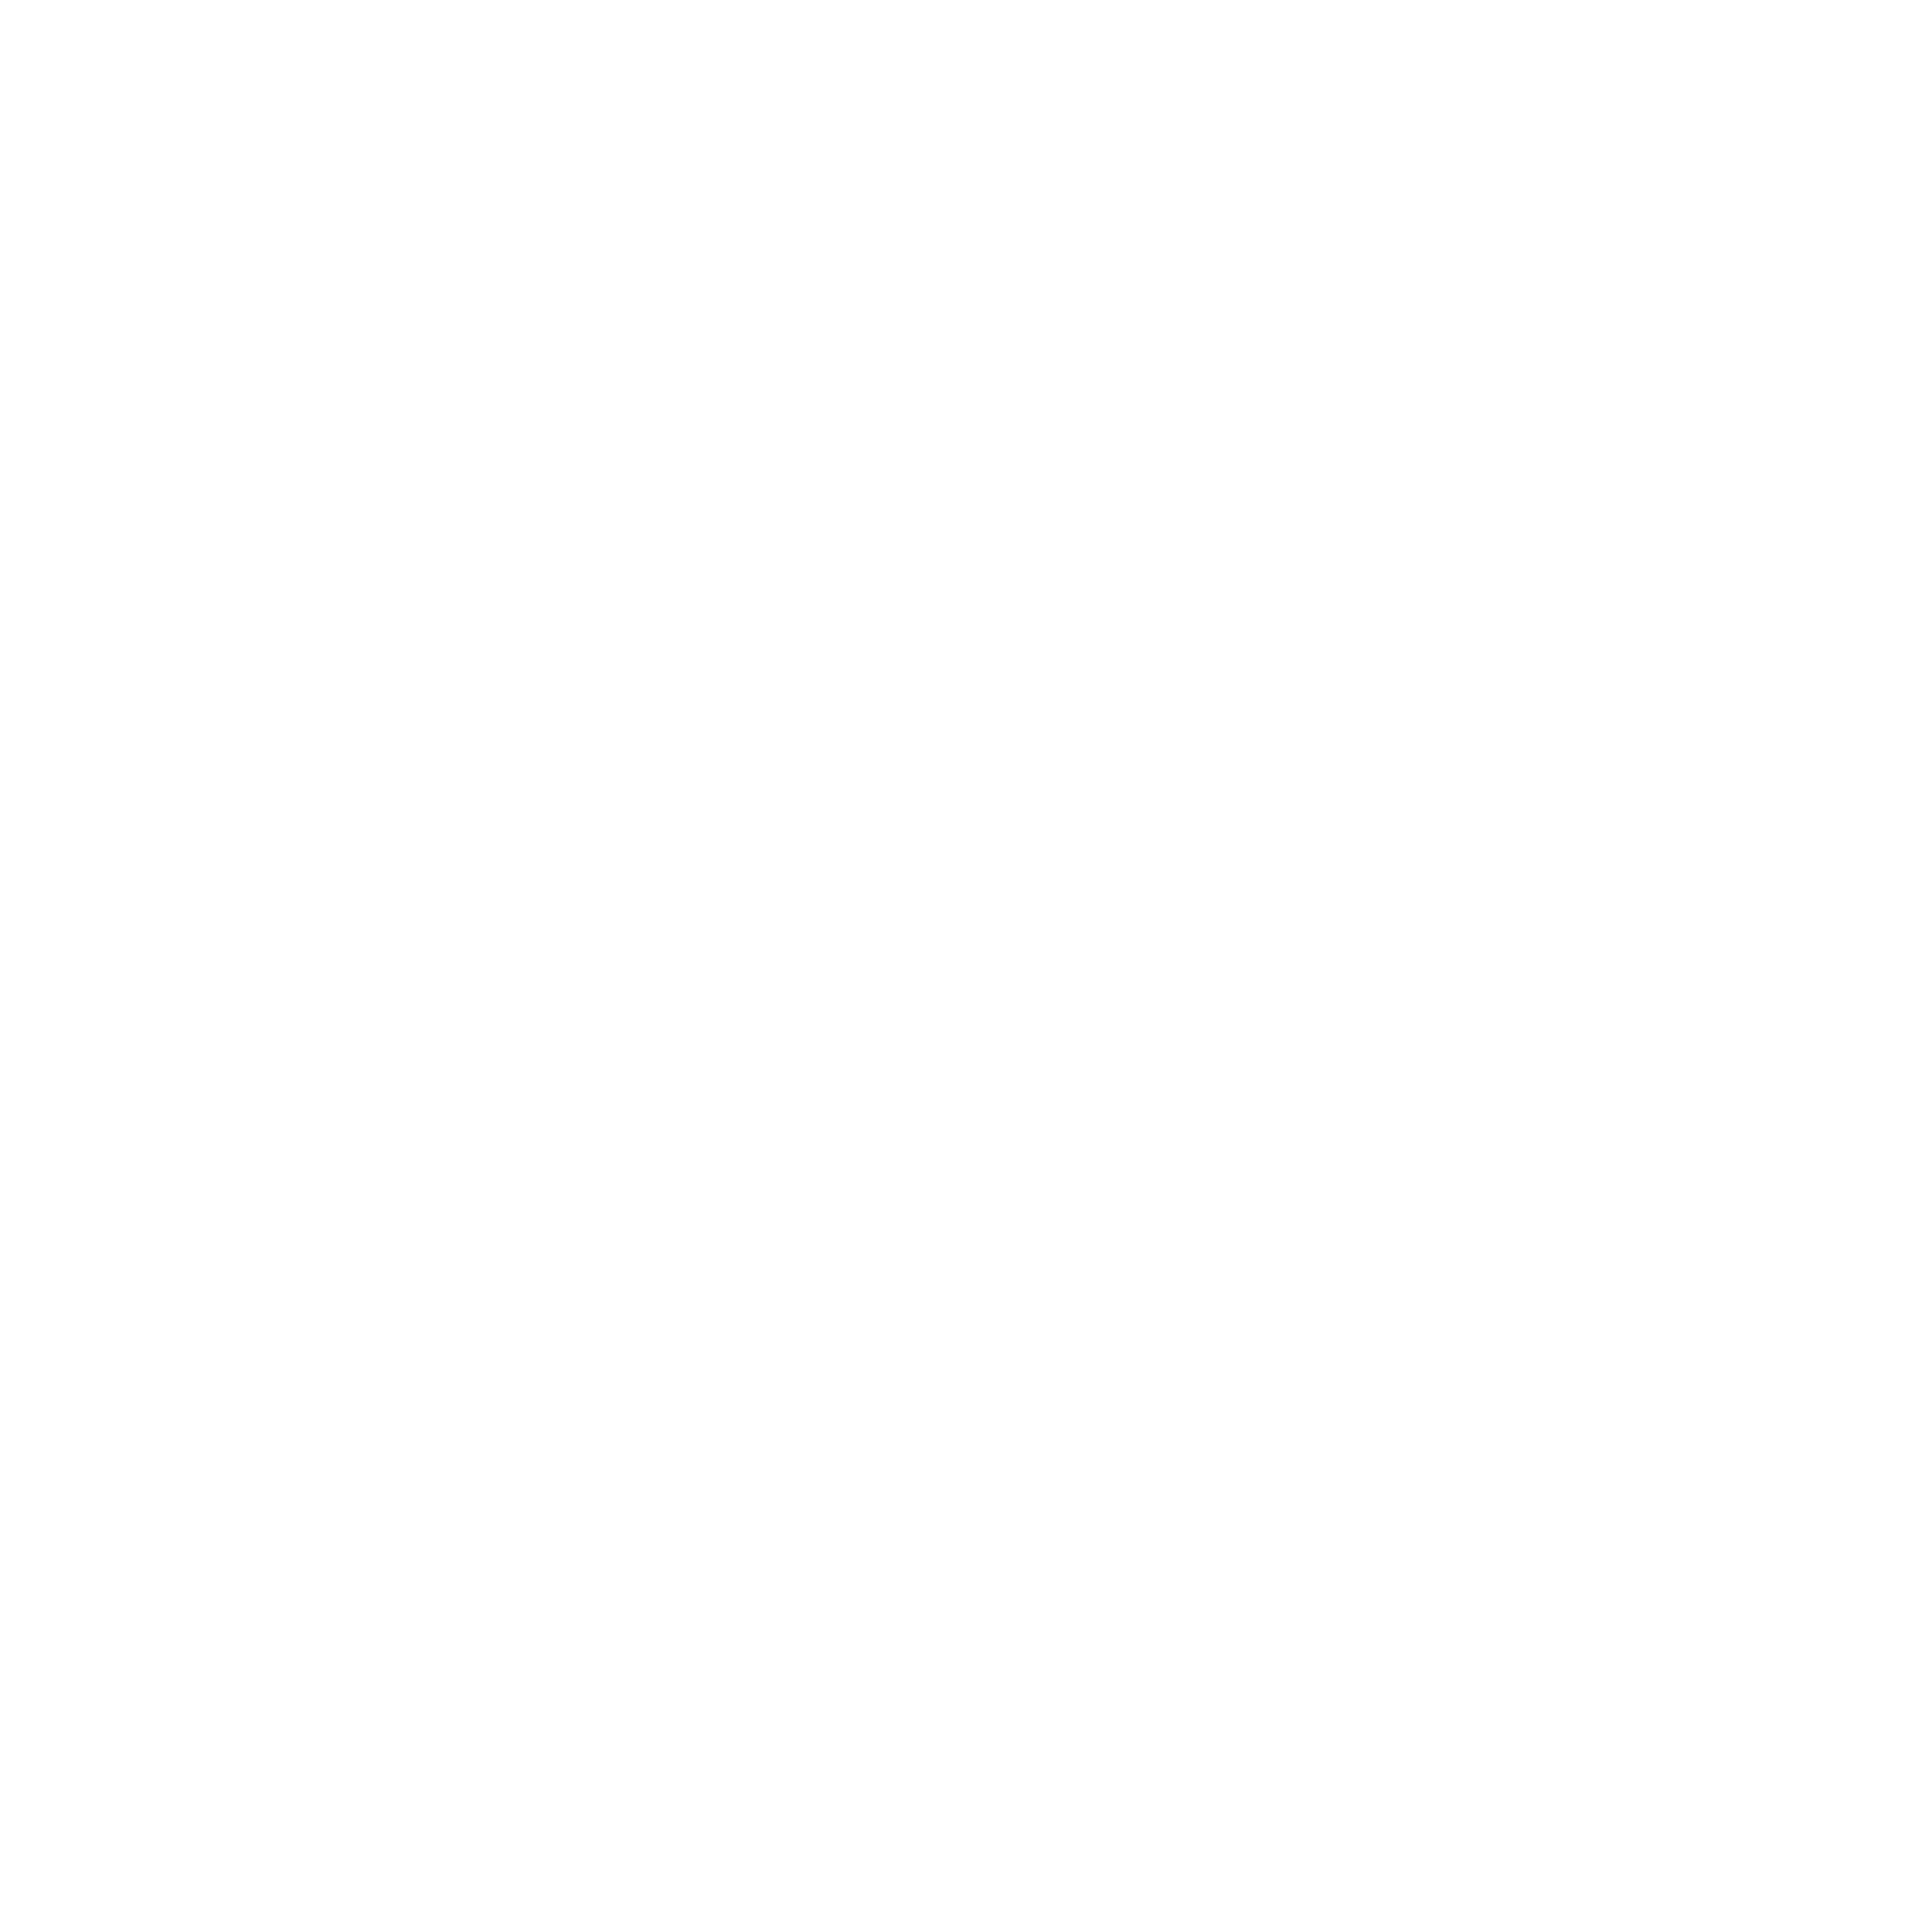

/Users/gracecox/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


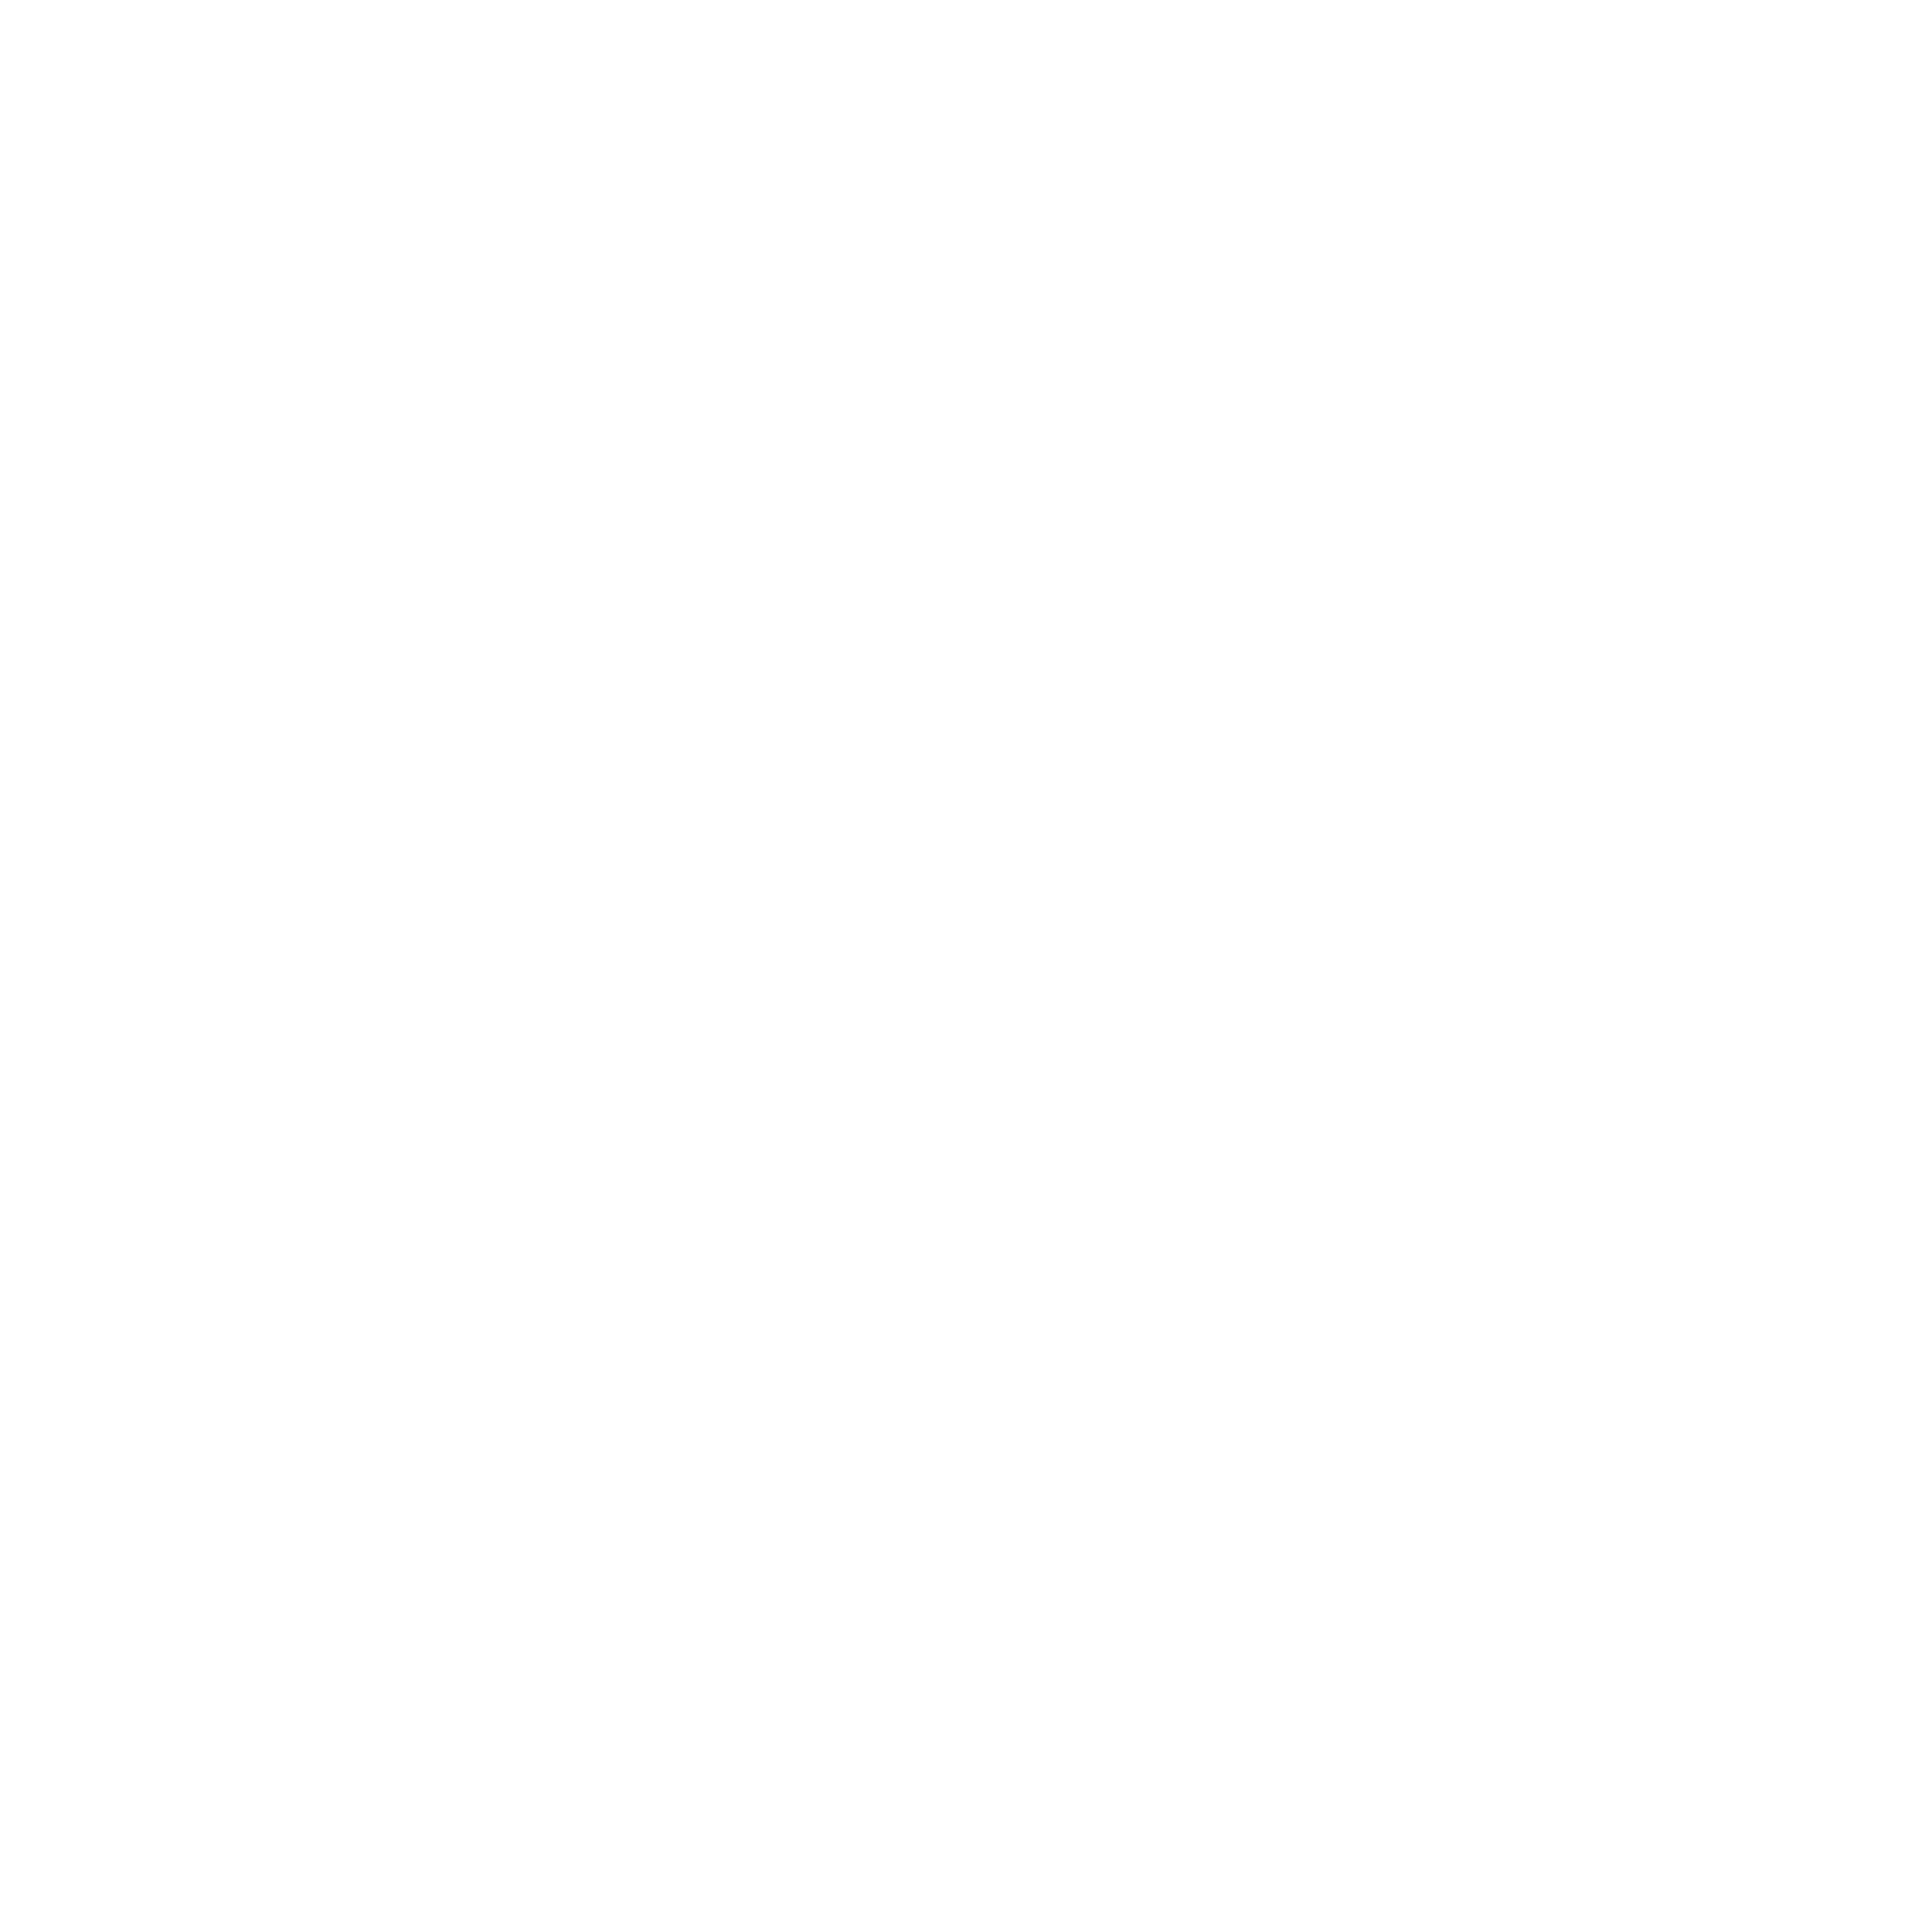

In [12]:
for observatory in obs_names:
    svplots.plot_sv_comparison(dates=dates, denoised_sv=denoised.filter(regex=observatory),
                               noisy_sv=obs_data.filter(regex=observatory), model=model_sv_data.filter(regex=observatory),
                    fig_size=(10, 10), font_size=14, label_size=20, plot_legend=True, obs=observatory,
                    plot_average=False, window_length=12, save_fig=True,
                               write_path=fig_path)

# Plot proxy signal, eigenvalues and eigenvectors

Compare the proxy signal used to denoise the data with the Dcx index (extended, corrected Dst index). Both signals are reduced to zero-mean and unit variance (z-score).

<IPython.core.display.Javascript object>


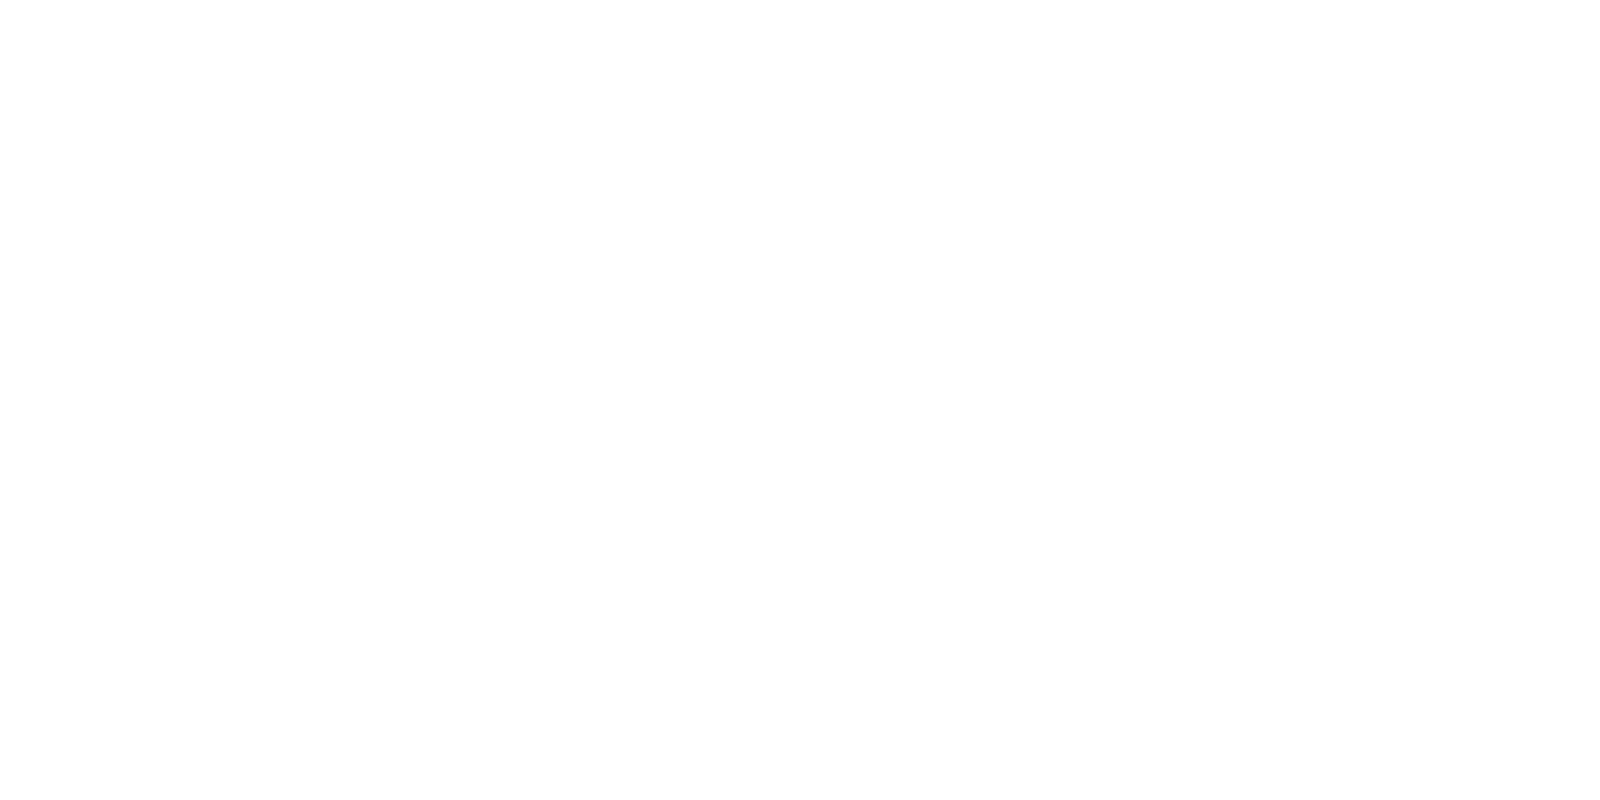

In [14]:
svplots.plot_dcx(dates=denoised.date, signal=proxy, fig_size=(8, 4), font_size=14, label_size=20, plot_legend=True,
                save_fig=True, write_path=fig_path)

Look at the DFT of the proxy signal and Dcx index

<IPython.core.display.Javascript object>


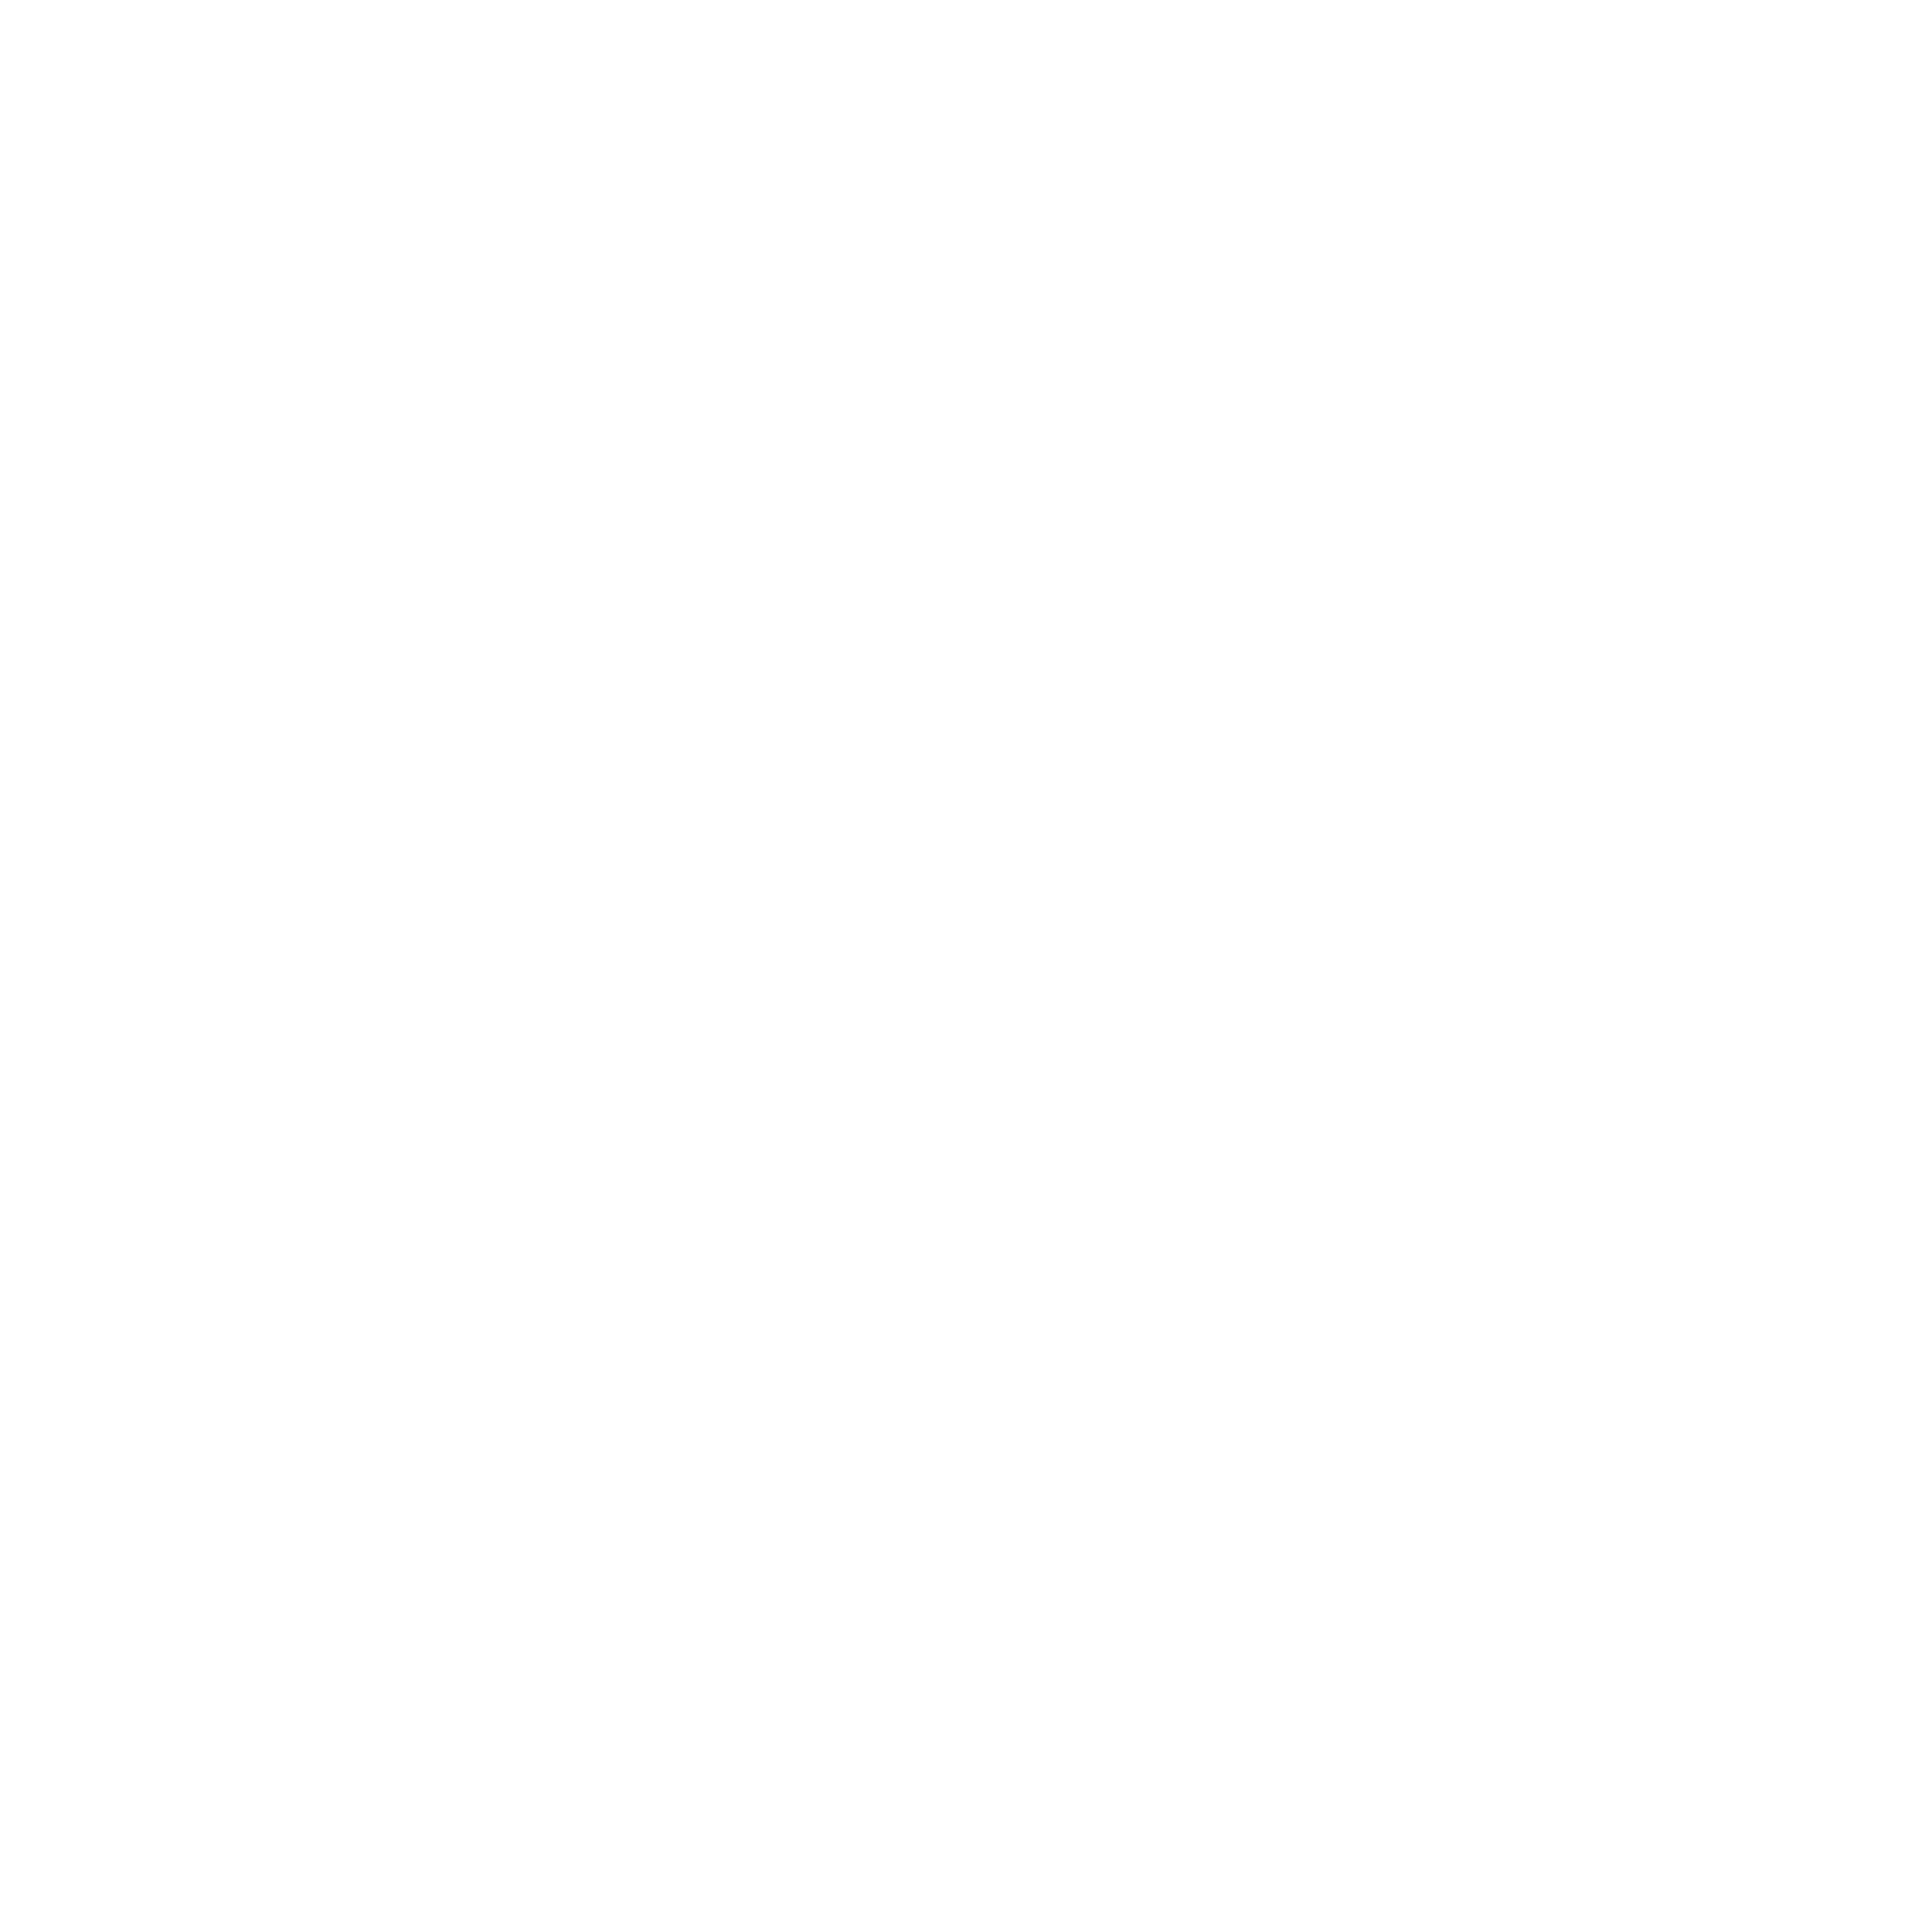

In [15]:
svplots.plot_dcx_fft(dates=denoised.date, signal=proxy, fig_size=(10, 10), font_size=16, label_size=20,
                     plot_legend=True, save_fig=True,
                     write_path=fig_path)

Plot the eigenvalues of the covariance matrix of the residuals

<IPython.core.display.Javascript object>


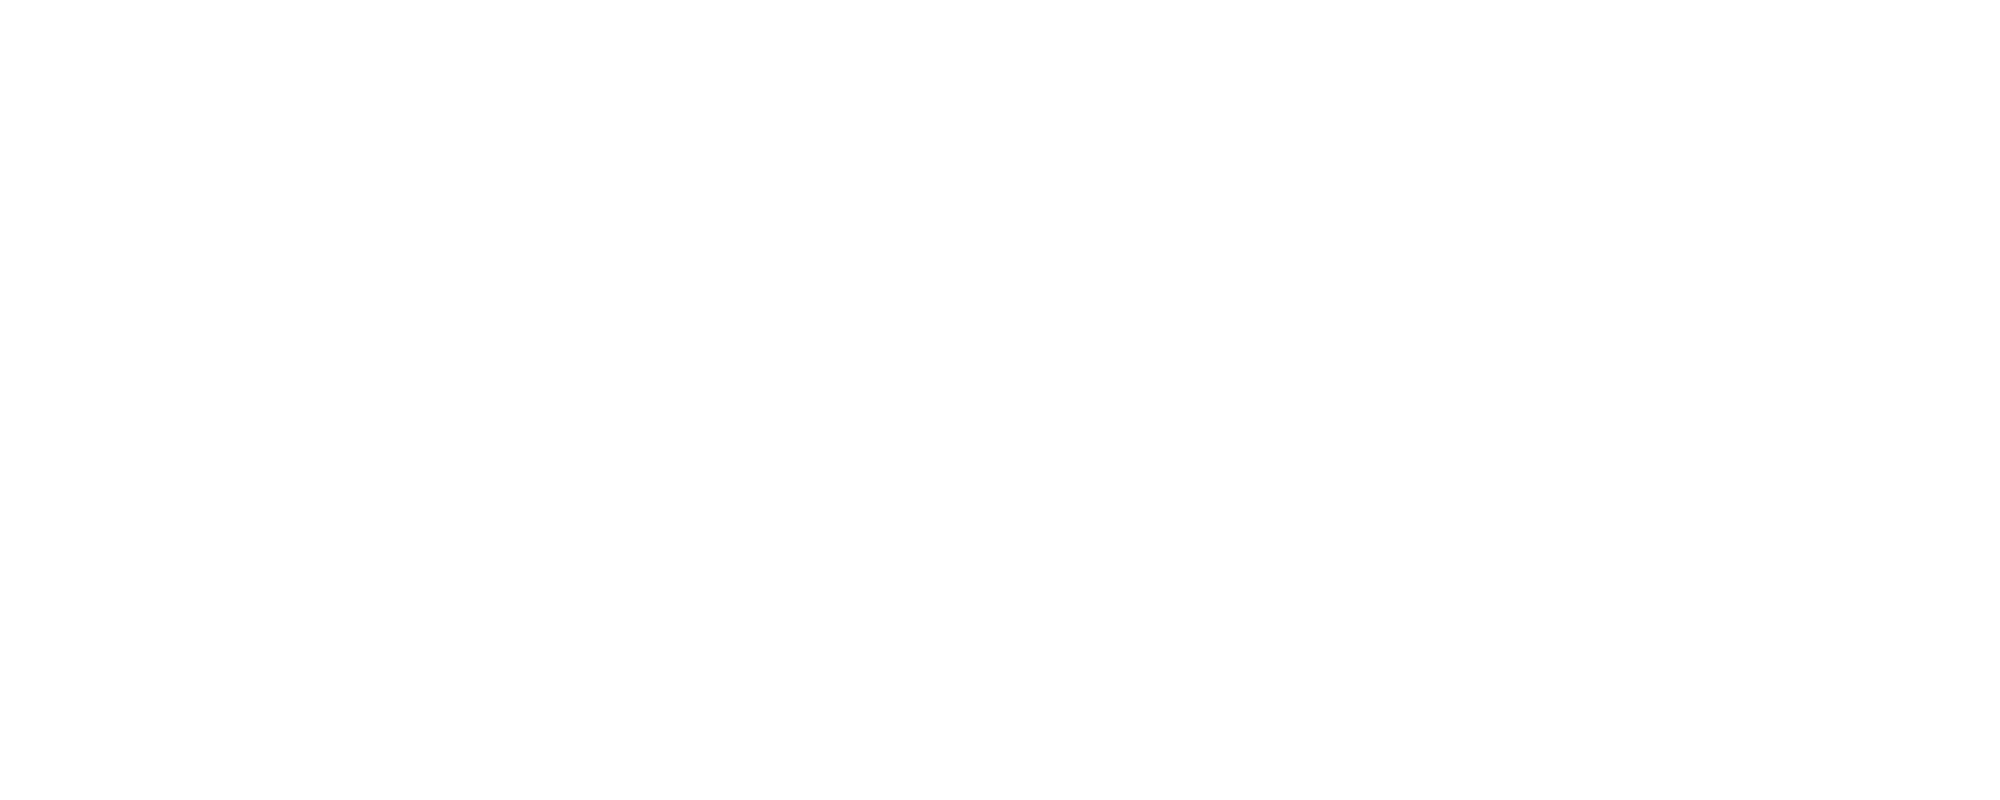

In [16]:
svplots.plot_eigenvalues(values=eigenvals, font_size=12, label_size=16, fig_size=(10, 4), save_fig=True,
                        write_path=fig_path)

Plot the eigenvectors corrresponding to the largest eigenvalue(s)

<IPython.core.display.Javascript object>


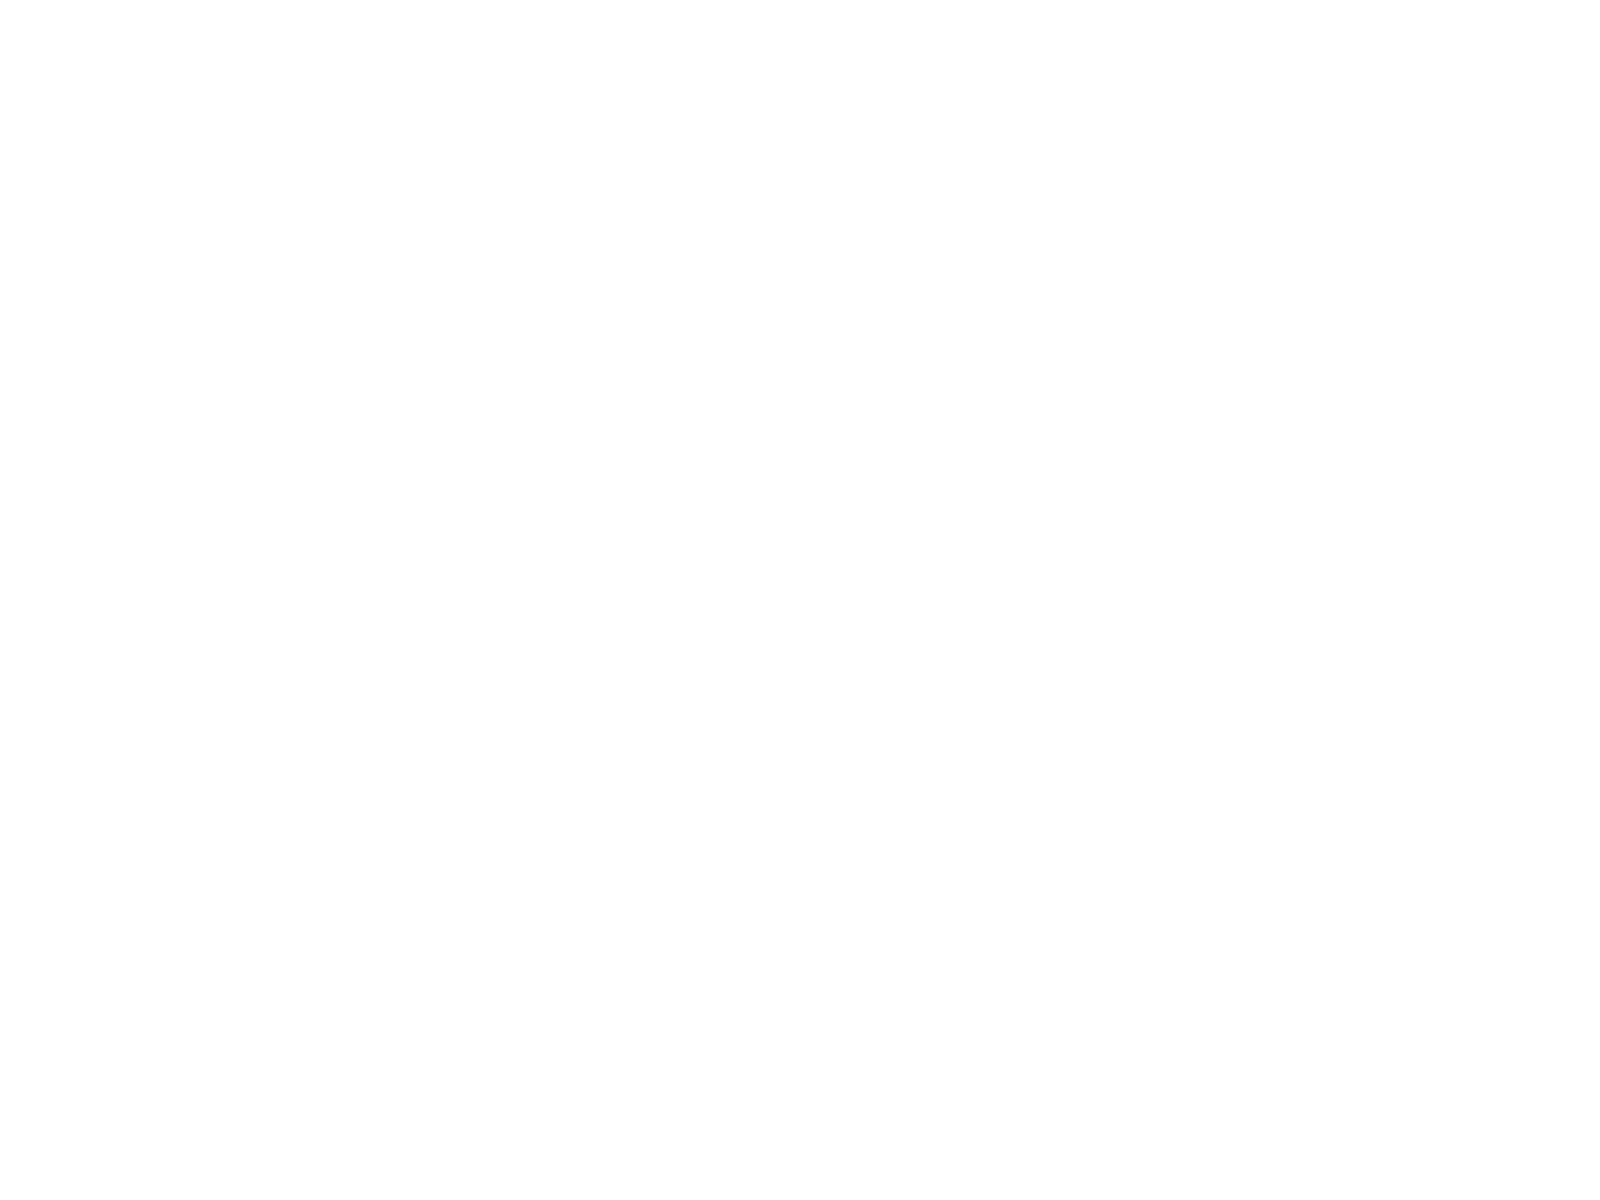

In [17]:
svplots.plot_eigenvectors(obs_names=obs_names, eigenvecs=eigenvecs, save_fig=True,
                          write_path=fig_path)

# Write denoised data to file

In [18]:
#for observatory in obs_names:
#    print(observatory)
#    sv_data=denoised.filter(regex=observatory)
#    sv_data.insert(0, 'date', dates)
#    sv_data.columns = ["date", "dX", "dY", "dZ"]
#    inputoutput.write_csv_data(data=sv_data, write_path="/Users/gracecox/Desktop/DataDownloads/denoised_sv/data/",
#                               obs_name=observatory, decimal_dates=True)

BRW
MBC
